In [1]:
# import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Varadharajan R\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
#load the train and test features of the images for resnet18 and densenet121 models
train = pd.read_csv("C:/Users/Varadharajan R/Desktop/FYP/resnet18_size224_train.csv")
test = pd.read_csv("C:/Users/Varadharajan R/Desktop/FYP/resnet18_size224_test.csv")

In [5]:
train

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [6]:
test

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [7]:
# Descriptive statistics
train.describe()

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [8]:
#label counts in each of train and test datasets
print(train['label'].value_counts())
print(test['label'].value_counts())

prunus_virginiana        138
prunus_sargentii         137
ulmus_pumila             121
cryptomeria_japonica     116
styrax_japonica           91
                        ... 
tilia_americana           11
quercus_phellos           10
fraxinus_americana        10
betula_lenta               9
pinus_thunbergii           6
Name: label, Length: 184, dtype: int64
prunus_virginiana          45
prunus_sargentii           31
catalpa_speciosa           26
ulmus_pumila               24
tilia_cordata              21
                           ..
tilia_tomentosa             2
toona_sinensis              2
quercus_robur               1
fraxinus_pennsylvanica      1
ulmus_americana             1
Name: label, Length: 183, dtype: int64


In [9]:
#normalizing the train and test dataset numerical pixel values before classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [10]:
sc_traindf

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [11]:
sc_testdf

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [12]:
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = train['label']
cattest = test['label']

# encode the categorical attributes
traincat = encoder.fit_transform(cattrain)
testcat = encoder.fit_transform(cattest)

# separate target column from encoded data 
train_x=sc_traindf
train_y=traincat
test_x=sc_testdf
test_y=testcat


In [13]:
train_x

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [14]:
train_y

array([ 59, 157, 158, 170, 118,  31,  94, 103, 134, 166, 157,   6, 140,
        75,  70, 182,  57,  34, 146, 117,  88,  65, 163,  95,  37,   4,
         4,  99, 168, 110, 130,  78,   2,  82, 146, 164,   6, 139, 175,
       133, 137, 142,  77,  57, 148,  28, 167, 146, 137, 123,  34, 101,
        76, 101,  88, 108, 137,  82, 127,  87, 135,  70,  28,  58, 140,
        71, 134, 167, 175,  53,  78, 164,  76, 105,  31, 139, 145,  57,
       146,   6,   4, 183, 131,  58,  49,  71,  84,  59,  72, 151, 145,
       158, 181,  34,  32, 154,  62, 140,  90,  38, 154, 130, 164,  53,
         9,  39,  61,  91,  91, 161,  89, 130, 115,  62,  71, 150, 150,
       138, 108, 129, 182, 113,   6, 110,  73,  92, 146,  52,  89, 181,
       182,   6,  98,   6,  73,   6, 134,  16, 150,  44, 109,  19,   6,
       130, 127, 111, 129, 108,  14,  61,  98,  57, 113, 115, 181,  14,
        59, 183,  79, 129, 139,  33, 137,  63,  35,  18,  40, 150,  77,
       127,  66,  82, 155, 156,  58,  19,   1,  16, 130,  62,  9

In [15]:
test_x

,PIXEL_0,PIXEL_1,PIXEL_2,PIXEL_3,PIXEL_4,PIXEL_5,PIXEL_6,PIXEL_7,PIXEL_8,PIXEL_9,PIXEL_10,PIXEL_11,PIXEL_12,PIXEL_13,PIXEL_14,PIXEL_15,PIXEL_16,PIXEL_17,PIXEL_18,PIXEL_19,PIXEL_20,PIXEL_21,PIXEL_22,PIXEL_23,PIXEL_24,PIXEL_25,PIXEL_26,PIXEL_27,PIXEL_28,PIXEL_29,PIXEL_30,PIXEL_31,PIXEL_32,PIXEL_33,PIXEL_34,PIXEL_35,PIXEL_36,PIXEL_37,PIXEL_38,PIXEL_39,PIXEL_40,PIXEL_41,PIXEL_42,PIXEL_43,PIXEL_44,PIXEL_45,PIXEL_46,PIXEL_47,PIXEL_48,PIXEL_49,PIXEL_50,PIXEL_51,PIXEL_52,PIXEL_53,PIXEL_54,PIXEL_55,PIXEL_56,PIXEL_57,PIXEL_58,PIXEL_59,PIXEL_60,PIXEL_61,PIXEL_62,PIXEL_63,PIXEL_64,PIXEL_65,PIXEL_66,PIXEL_67,PIXEL_68,PIXEL_69,PIXEL_70,PIXEL_71,PIXEL_72,PIXEL_73,PIXEL_74,PIXEL_75,PIXEL_76,PIXEL_77,PIXEL_78,PIXEL_79,PIXEL_80,PIXEL_81,PIXEL_82,PIXEL_83,PIXEL_84,PIXEL_85,PIXEL_86,PIXEL_87,PIXEL_88,PIXEL_89,PIXEL_90,PIXEL_91,PIXEL_92,PIXEL_93,PIXEL_94,PIXEL_95,PIXEL_96,PIXEL_97,PIXEL_98,PIXEL_99,PIXEL_100,PIXEL_101,PIXEL_102,PIXEL_103,PIXEL_104,PIXEL_105,PIXEL_106,PIXEL_107,PIXEL_108,PIXEL_109,PIXEL_110,PIXEL_111,PIXEL_112,PIXEL_113,PIXEL_114,PIXEL_115,PIXEL_116,PIXEL_117,PIXEL_118,PIXEL_119,PIXEL_120,PIXEL_121,PIXEL_122,PIXEL_123,PIXEL_124,PIXEL_125,PIXEL_126,PIXEL_127,PIXEL_128,PIXEL_129,PIXEL_130,PIXEL_131,PIXEL_132,PIXEL_133,PIXEL_134,PIXEL_135,PIXEL_136,PIXEL_137,PIXEL_138,PIXEL_139,PIXEL_140,PIXEL_141,PIXEL_142,PIXEL_143,PIXEL_144,PIXEL_145,PIXEL_146,PIXEL_147,PIXEL_148,PIXEL_149,PIXEL_150,PIXEL_151,PIXEL_152,PIXEL_153,PIXEL_154,PIXEL_155,PIXEL_156,PIXEL_157,PIXEL_158,PIXEL_159,PIXEL_160,PIXEL_161,PIXEL_162,PIXEL_163,PIXEL_164,PIXEL_165,PIXEL_166,PIXEL_167,PIXEL_168,PIXEL_169,PIXEL_170,PIXEL_171,PIXEL_172,PIXEL_173,PIXEL_174,PIXEL_175,PIXEL_176,PIXEL_177,PIXEL_178,PIXEL_179,PIXEL_180,PIXEL_181,PIXEL_182,PIXEL_183,PIXEL_184,PIXEL_185,PIXEL_186,PIXEL_187,PIXEL_188,PIXEL_189,PIXEL_190,PIXEL_191,PIXEL_192,PIXEL_193,PIXEL_194,PIXEL_195,PIXEL_196,PIXEL_197,PIXEL_198,PIXEL_199,PIXEL_200,PIXEL_201,PIXEL_202,PIXEL_203,PIXEL_204,PIXEL_205,PIXEL_206,PIXEL_207,PIXEL_208,PIXEL_209,PIXEL_210,PIXEL_211,PIXEL_212,PIXEL_213,PIXEL_214,PIXEL_215,PIXEL_216,PIXEL_217,PIXEL_218,PIXEL_219,PIXEL_220,PIXEL_221,PIXEL_222,PIXEL_223,PIXEL_224,PIXEL_225,PIXEL_226,PIXEL_227,PIXEL_228,PIXEL_229,PIXEL_230,PIXEL_231,PIXEL_232,PIXEL_233,PIXEL_234,PIXEL_235,PIXEL_236,PIXEL_237,PIXEL_238,PIXEL_239,PIXEL_240,PIXEL_241,PIXEL_242,PIXEL_243,PIXEL_244,PIXEL_245,PIXEL_246,PIXEL_247,PIXEL_248,PIXEL_249,PIXEL_250,PIXEL_251,PIXEL_252,PIXEL_253,PIXEL_254,PIXEL_255,PIXEL_256,PIXEL_257,PIXEL_258,PIXEL_259,PIXEL_260,PIXEL_261,PIXEL_262,PIXEL_263,PIXEL_264,PIXEL_265,PIXEL_266,PIXEL_267,PIXEL_268,PIXEL_269,PIXEL_270,PIXEL_271,PIXEL_272,PIXEL_273,PIXEL_274,PIXEL_275,PIXEL_276,PIXEL_277,PIXEL_278,PIXEL_279,PIXEL_280,PIXEL_281,PIXEL_282,PIXEL_283,PIXEL_284,PIXEL_285,PIXEL_286,PIXEL_287,PIXEL_288,PIXEL_289,PIXEL_290,PIXEL_291,PIXEL_292,PIXEL_293,PIXEL_294,PIXEL_295,PIXEL_296,PIXEL_297,PIXEL_298,PIXEL_299,PIXEL_300,PIXEL_301,PIXEL_302,PIXEL_303,PIXEL_304,PIXEL_305,PIXEL_306,PIXEL_307,PIXEL_308,PIXEL_309,PIXEL_310,PIXEL_311,PIXEL_312,PIXEL_313,PIXEL_314,PIXEL_315,PIXEL_316,PIXEL_317,PIXEL_318,PIXEL_319,PIXEL_320,PIXEL_321,PIXEL_322,PIXEL_323,PIXEL_324,PIXEL_325,PIXEL_326,PIXEL_327,PIXEL_328,PIXEL_329,PIXEL_330,PIXEL_331,PIXEL_332,PIXEL_333,PIXEL_334,PIXEL_335,PIXEL_336,PIXEL_337,PIXEL_338,PIXEL_339,PIXEL_340,PIXEL_341,PIXEL_342,PIXEL_343,PIXEL_344,PIXEL_345,PIXEL_346,PIXEL_347,PIXEL_348,PIXEL_349,PIXEL_350,PIXEL_351,PIXEL_352,PIXEL_353,PIXEL_354,PIXEL_355,PIXEL_356,PIXEL_357,PIXEL_358,PIXEL_359,PIXEL_360,PIXEL_361,PIXEL_362,PIXEL_363,PIXEL_364,PIXEL_365,PIXEL_366,PIXEL_367,PIXEL_368,PIXEL_369,PIXEL_370,PIXEL_371,PIXEL_372,PIXEL_373,PIXEL_374,PIXEL_375,PIXEL_376,PIXEL_377,PIXEL_378,PIXEL_379,PIXEL_380,PIXEL_381,PIXEL_382,PIXEL_383,PIXEL_384,PIXEL_385,PIXEL_386,PIXEL_387,PIXEL_388,PIXEL_389,PIXEL_390,PIXEL_391,PIXEL_392,PIXEL_393,PIXEL_394,PIXEL_395,PIXEL_396,PIXEL_397,PIXEL_398,PIXEL_399,PIXEL_400,PIXEL_401,PIXEL_402,PIXEL_403,PIXEL_404,PIXEL_405,PIXEL_406,PIXEL_407,PIXEL_408,PIXEL_409,PIXEL_410

In [16]:
test_y

array([166,   6,  57, 127,  37,  95,  93,  53,  97,  55, 133, 172,  97,
       114, 168,  58, 101, 167,   0,  93,  37,  56,  39,  24, 157,  30,
       115, 144,  52, 111,  94,   8,  88,  15, 176, 179, 149, 173, 180,
       126,  91,  40,  60, 144, 133,  44, 152,  33,  58, 106, 129, 148,
       132,   7,  81,  57,  52, 149, 147,  49, 122,  30,  70, 136,  65,
        16, 160, 106, 133, 133, 160,  97, 119,  39,  38, 106,   2, 135,
       128, 178, 167,  80, 126,  16, 154,  97,  69, 128,  49,  22, 148,
        72,  33,  49,  43,  23, 176,  31, 148, 180,  79,  32,  56, 177,
       172, 180,  16, 125,  32,  75,  16,  86,  46,  65, 133,  59,  48,
       139, 118, 176,  56,   5,  84,  42, 145, 158, 142,  80,  48, 160,
       134,  39, 135,  67,  65,  52,  11,  32,  78, 176,  97, 180,  65,
        30, 144,  19, 160, 146, 109, 133,  58,  40, 160, 167,  98,  48,
        60,  63, 127, 157, 170, 102,  72,  60, 182, 169,  31, 111, 138,
       169, 102,   5,  43, 158,   6, 182, 180, 162,  58, 180,  9

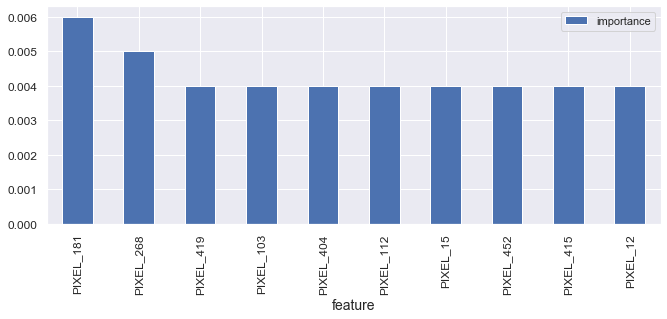

In [17]:
#identifying the important features through RFC Scores

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
#importances.plot.bar();
importances.head(10).plot.bar();

In [21]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(train_x,train_y)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(train_x,train_y)

#SVM classifier
SVM_Classifier = SVC()
SVM_Classifier.fit(train_x,train_y)

ValueError: 'gaussian' is not in list

In [19]:
#EVALUATING THE MODELS
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('Support Vector Machine Classifier', SVM_Classifier))

for i, v in models:
    scores = cross_val_score(v, train_x,train_y, cv=10)
    accuracy = metrics.accuracy_score(train_y, v.predict(train_x))
    confusion_matrix = metrics.confusion_matrix(train_y, v.predict(train_x))
    classification = metrics.classification_report(train_y, v.predict(train_x))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
    
#    print("Classification report:" "\n", classification) 
#    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.7241927808328098

Model Accuracy:
 0.8217004048582996


============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.35988731608840363

Model Accuracy:
 0.974089068825911


============================== Support Vector Machine Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8554112901713612

Model Accuracy:
 0.9621052631578947



In [20]:
#VALIDATING THE MODELS
for i, v in models:
    accuracy = metrics.accuracy_score(test_y, v.predict(test_x))
    confusion_matrix = metrics.confusion_matrix(test_y, v.predict(test_x))
    classification = metrics.classification_report(test_y, v.predict(test_x))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
#     print("Classification report:" "\n", classification) 
#     print() 


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.23963730569948186


============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.12370466321243523


============================== Support Vector Machine Classifier Model Test Results ==============================

Model Accuracy:
 0.2700777202072539

